In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Part 1: Linear Regression

### Load data

For the first part we will use a simple dataset that is available on SKlearn. You can go through the [documentation](https://scikit-learn.org/stable/datasets/index.html#boston-dataset) for more details about the. Our job is to use the Boston Housing Dataset to try and predict the price of a house given various attributes such as crime rate in the area, size etc.

In [84]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


### Explore Data

#### Check if any cleaning is required

Note that this is a fairly clean dataset, regardless, it is always a good idea to see if there are any missing values and if the data types are all valid inputs for regression analysis. 

This may or may not lead to any results, but in any Data Science project it is a good idea to minimize assumptions and be sure of what you are doing. There isn't a need to overthink this, just make sure there are no surprises in the data.

In [85]:
# Add code here to check for data cleaning

# Hence no missing values
print(data.isnull().sum())
print('')

# All features are of correct data types
print(data.dtypes)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object


#### Find out important features

Before any features are used in Linear Regression, checking for collinearity is essential. While again, this is less essential in some cases, we want to reduce computation time while still have the highest possible accuracy.

Again, note that there is no right answer to this, you will be graded on methodology and on what you plan to do with the features. In the end what matters is having a low mean squared error, and you can come back to this part again and again if you feel adding or removing a certain feature would make your model better.

Hint: There is one very common way of checking for collinearity, if you are able to quickly and efficiently visualize correlations between all variables, it would allow you to analyize this part in an easier way. Check out the [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function in Seaborn

In [86]:
corr = data.corr() # Code to get correlation matrix from data
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


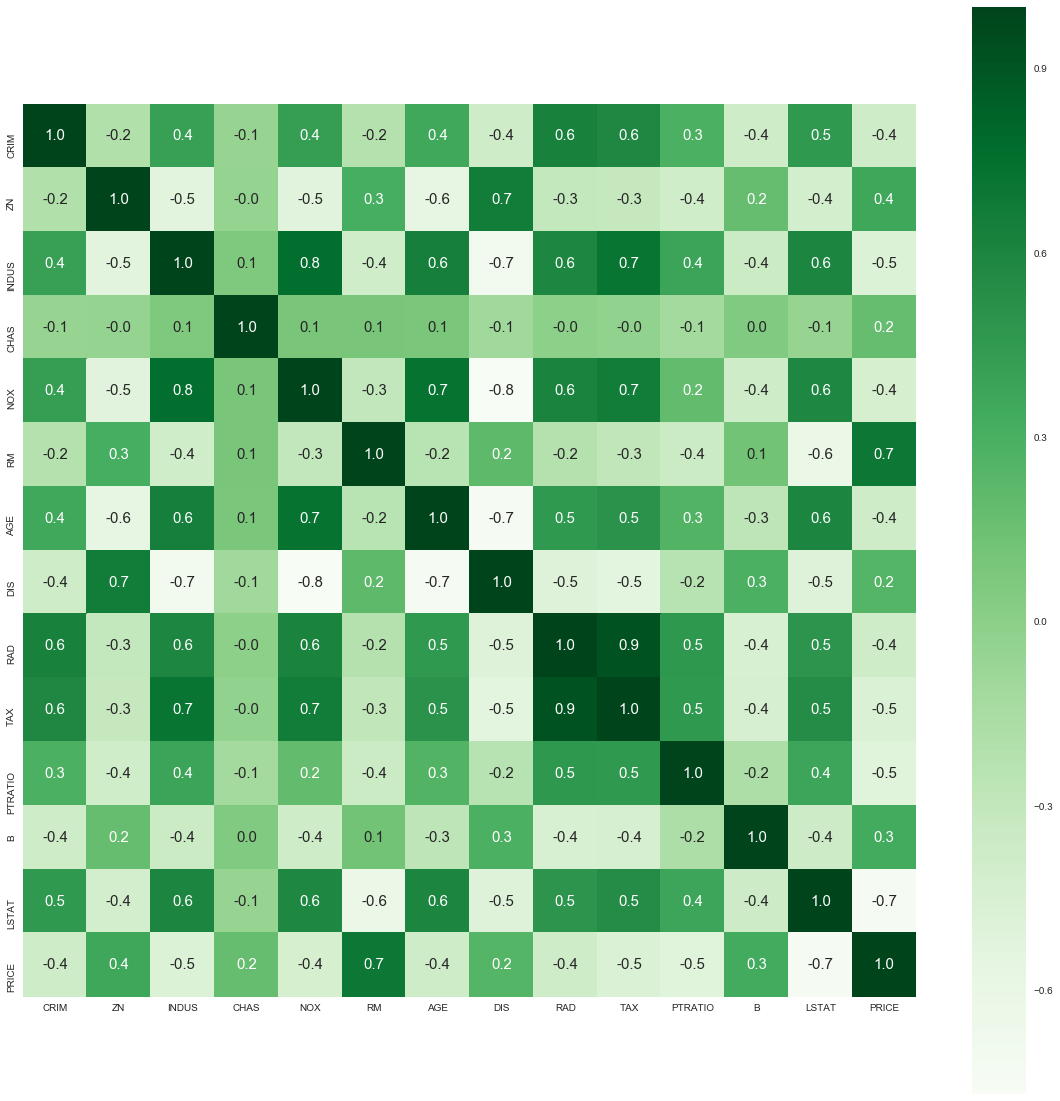

In [87]:
# The above correlation matrix can be passed directly to sns.heatmap
# This is one way of visualizing a Confusion Matrix
# Feel free to change this if you don't agree with this implementation

plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### If there are any features that should dropped, do so below, and justify your decision

In [88]:
# Code to drop features - if any
del data['TAX']
del data['NOX']

# They both have a high correlation and since price is dependent on both of them they can affect the final accuracy of our
# model so dropping these two

### Linear Regression

Here you will be making the SKLearn Linear Regression class. Most of the skeleton code is provided, you just have to convert the mathematical equations you have learnt in class into code. The coding in this part is very small, and ideal solutions can be done in just a few lines per function. If you take the shortcut and try to copy the solution, you will lose out on important learning. You can make helper functions if you wish. The Tutorial Notebooks can help you here - but even they don't contain the *exact and ideal* solution. 

**Note: Your solution has to be efficient**. Using simple for loops to iterate over all data-points will not earn you full marks, you should try to use vectorized versions of the equations. You have covered these in class as well, and there are plenty of online resources. The following links should help you out, but refrain from copying from them directly, **they don't contain the exact solution that can be applied to this skeleton code**

[Vectorization Implementation in Machine Learning](https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d): Should give you a very good primer on vectorization

[Vectorized Implementation Cheat Sheet](https://medium.com/ml-ai-study-group/vectorized-implementation-of-cost-functions-and-gradient-vectors-linear-regression-and-logistic-31c17bca9181): Can be used to infer some vectorized operations

[Loss Function with Code](https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/) take this with a grain of salt. The absolute value derivative can lead to a division by 0 if $Y - Y_{pred} = 0$

[np.where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) can help with implementing the derivatives

**Note: Make sure you deal with exploding weights or division by zeros.** This can be done by changing the learning rates and using the right algorithms when calculating the derivatives. If you get an "overflow" error, try to **reduce the learning rate and double check your loss derivative**

In [89]:
# This is a Linear Regression class you will be implemented
# It will work similar to how SKLearn functions work
class LinearRegression():
    @staticmethod
    def mean_squared_loss(Y, Y_pred):
#       You can use this as a sample
        return np.mean((Y - Y_pred) ** 2)

### IMPLEMENT THIS FUNCTION
    @staticmethod
    def mean_abs_loss(Y, Y_pred):
        return np.mean(abs(Y-Y_pred))# mean absolute loss
    
### IMPLEMENT THIS FUNCTION
    def mean_huber_loss(self, Y_pred, Y):
        '''
        Implement Mean Huber Loss. self.huber_alpha will allow
        you to access the Huber Alpha value passed to the model
        '''
        f =  (1/2)*((Y-Y_pred)**2)
        s = (self.huber_alpha*(abs(Y-Y_pred))) - ((1/2)*(self.huber_alpha**2))
        mhl = np.mean(np.where(abs(Y-Y_pred)<self.huber_alpha, f, s))
        return mhl # mean huber loss

    @staticmethod
    def der_squared_loss(X, Y, Y_pred):
####### You can use this as a sample
        return ((Y_pred - Y)) / (float(len(X)))
        
    @staticmethod
    def der_abs_loss(X, Y, Y_pred):
        '''np.where could prove handy here'''
        # Your code here
        
        return ((-1)*(Y - Y_pred) / abs(Y-Y_pred)) / float(len(X))# mean absolute loss derivative
        
    def der_huber_loss(self, X, Y, Y_pred):
        '''np.where could prove handy here'''
        # Your code here
        f =  -1*(Y-Y_pred)
        s = -(self.huber_alpha*((Y-Y_pred)/abs(Y-Y_pred)))
        dhl = (np.where(abs(Y-Y_pred)<self.huber_alpha, f, s))/float(len(X))
        return dhl # mean huber loss derivative
        
    def __init__(self, fit_intercept=True, normalize=False, loss_func= 'mse', huber_alpha=1.0,max_iter=1000, learning_rate = 0.001, tol=0.001):
        '''
            This function initializes all of the variables of this class
            Pay close attention to them and try to figure out what each 
            of them mean and how to use them in the functions below
        '''
        self.weights_ = None
        self.bias_ = None
        self.max_iter_ = max_iter
        self.fit_intercept_ = fit_intercept
        self.learning_rate_ = learning_rate
        self.tol_ = tol
        self.huber_alpha = huber_alpha
        self.loss_func_ = loss_func
        self.loss_dict = {
            'mse': self.mean_squared_loss,
            'abs': self.mean_abs_loss,
            'huber': self.mean_huber_loss
        }
        self.der_dict = {
            'mse': self.der_squared_loss,
            'abs': self.der_abs_loss,
            'huber': self.der_huber_loss
        }

    def _init_weights(self, num_features):
        '''This function initializes the weights randomly. 
        You can chose to change this to more advances techniques
        But they are way beyond the scope of this course'''
        self.weights_ = np.random.normal(size=(num_features,1))

#   Here we won't be using an analytical solution, but rather gradient descent
#   This is so it is easier to incorporate regularization
    def fit(self, X, Y):
        assert len(X) == len(Y), "X and Y should be of the same length"
        if self.fit_intercept_:
            X = np.concatenate((X, np.ones(shape=(len(X), 1))), axis=1)
        self._init_weights(X.shape[1])

        old_loss = np.inf
        converged = False
        for i in range(self.max_iter_):
#           Write code to get prediction
            Y_pred =  X @ self.weights_

########### loss functions are stored in a dictionary 
########### this saves up on many if conditions
            loss = self.loss_dict[self.loss_func_](Y, Y_pred)
########### To break when the difference in losses is very low
            if np.abs(loss - old_loss) < self.tol_:
                converged = True
                break
            old_loss = loss

########### derivative functions are also stored in a dictionary
            loss_der = self.der_dict[self.loss_func_](X, Y, Y_pred)

#           Write code to Update weights
            self.weights_= self.weights_ - (np.transpose(X) @ loss_der)
#       To check if for loop broke in the if statement or just reached max iterations
        if converged:
            print("Model Converged")
        else:
            print("Warning: Max iterations reached, model did not converge")
            
### Used to predict a Y, given an X
    def predict(self, X):
        if self.fit_intercept_:
            X = np.concatenate((X, np.ones(shape=(len(X), 1))), axis=1)
        Y_pred = X @ self.weights_ # Contains the same line as in the function above
        return Y_pred

    def get_coefficients(self):
        return self.weights_
    
    

### Applying Linear Regression to dataset

You will run into many problems such as exploding weights, division by zero. This StandardScaler will fix a lot of those problems. Read up on how and why it is used.

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
Y = data[['PRICE']].to_numpy()

X = data[list(data.columns)].to_numpy()
# We have to convert the dataframes to numpy for our implementation

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(506, 12)
(506, 1)


In [92]:
Regressor = LinearRegression(loss_func='huber',fit_intercept=False)

In [93]:
Regressor.fit(X, Y)

Model Converged


### Evaluating Linear Regression

Some starter code is provided here so you guys know how to make the graphs - now it is your job to decide how to use the train and test sets to figure out if the model is good or not. 

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

reg = LinearRegression(loss_func='huber',learning_rate=0.1, huber_alpha=1)
reg.fit(X_train, Y_train)
# Make predictions and calculate the Residuals from those predictions
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)
train_residuals = Y_train_pred - Y_train
test_residuals = Y_test_pred - Y_test

print("The Mean Squared Error on train set is:", 
      mean_squared_error(Y_train, Y_train_pred))
print("The Absolute Error on train set is:", 
      mean_absolute_error(Y_train, Y_train_pred))
print("The Mean Squared Error on test set is:", 
      mean_squared_error(Y_test, Y_test_pred))
print("The Absolute Error on test set is:", 
      mean_absolute_error(Y_test, Y_test_pred))


The Mean Squared Error on train set is: 4.00436635170943
The Absolute Error on train set is: 1.672376246344242
The Mean Squared Error on test set is: 4.7969090756349875
The Absolute Error on test set is: 1.9048272239409807


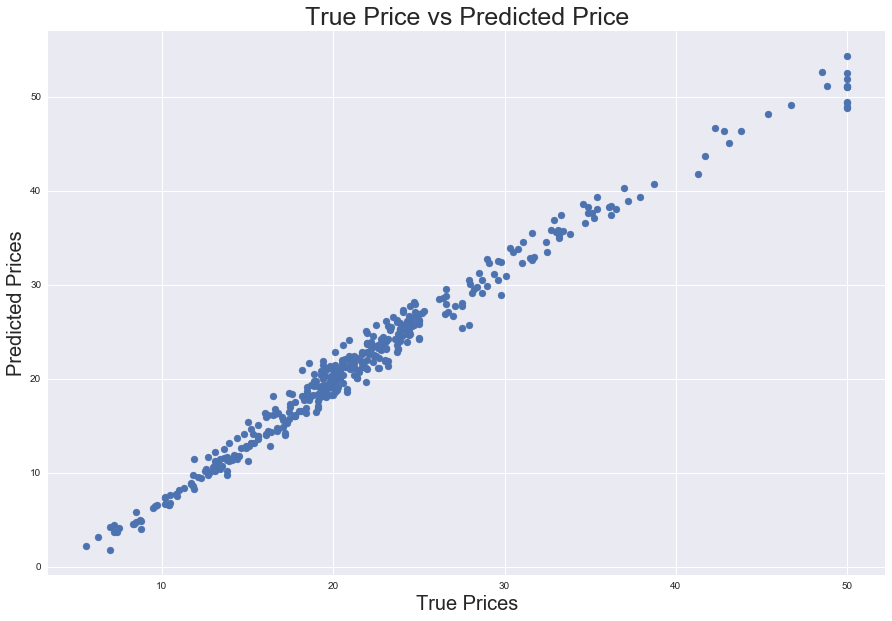

In [96]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train, Y_train_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price", size=25)
plt.show()

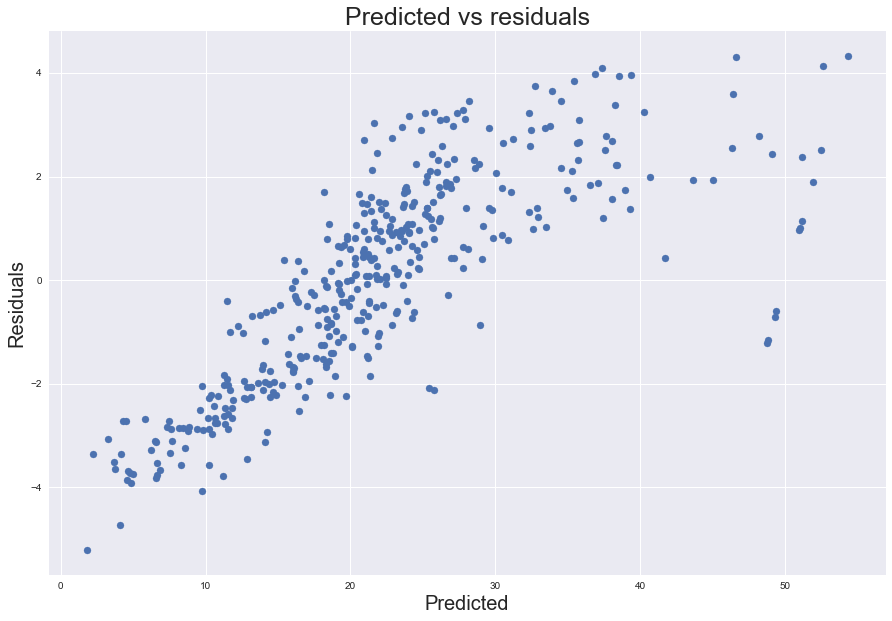

In [97]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train_pred,train_residuals)
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("Predicted vs residuals", size=25)
plt.show()

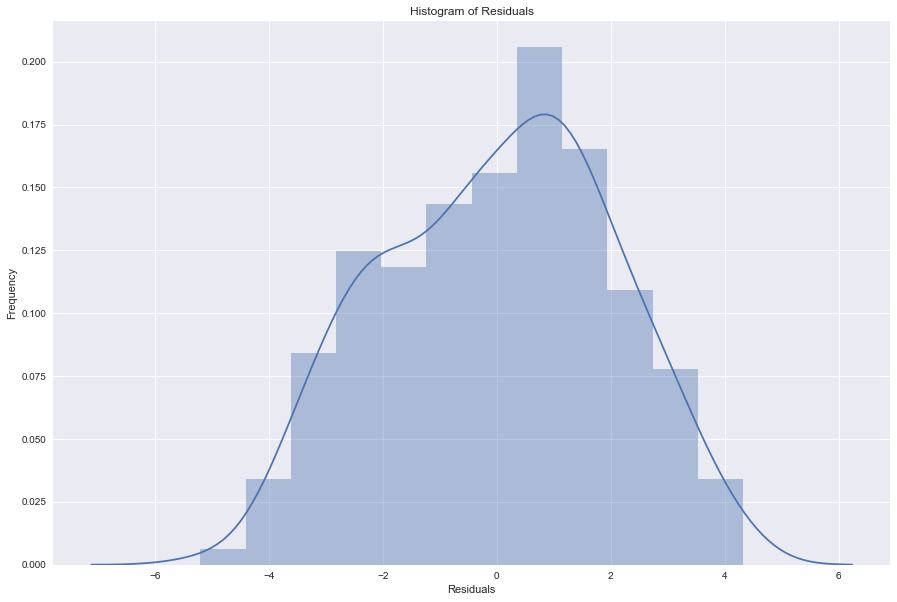

In [98]:
plt.figure(figsize=(15,10))
sns.distplot(train_residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

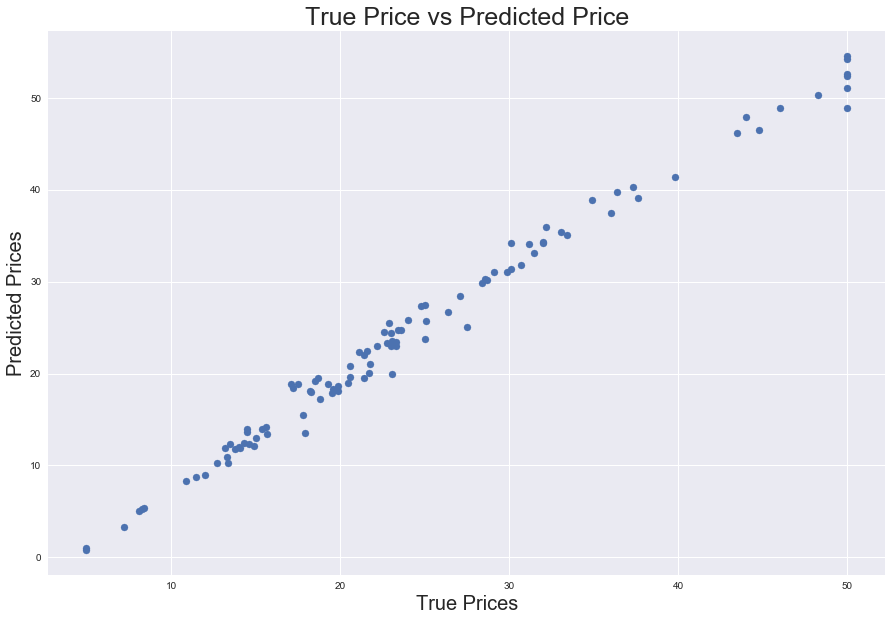

In [99]:
# Apply the above code to the test set as well to see any inconsistencies
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price", size=25)
plt.show()




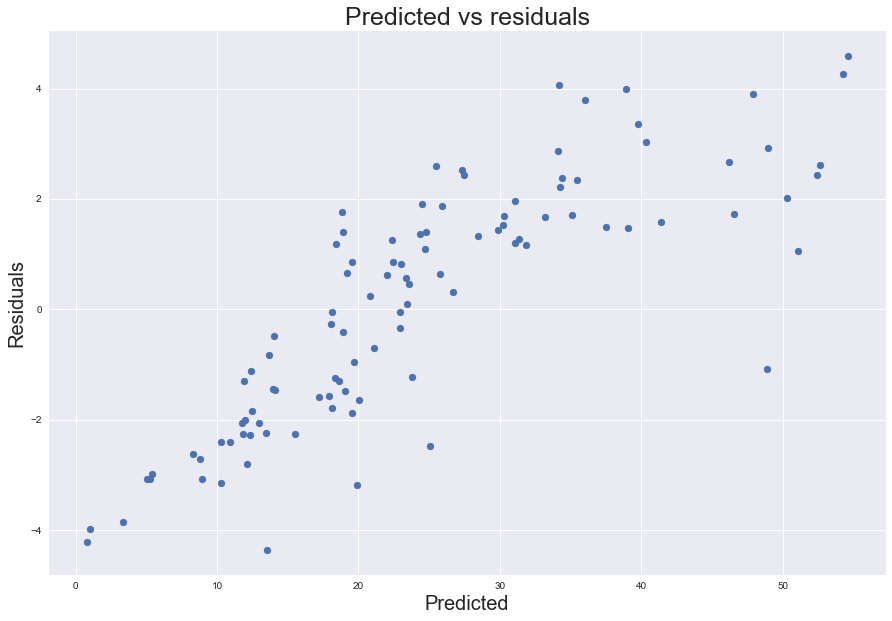

In [100]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test_pred,test_residuals)
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("Predicted vs residuals", size=25)
plt.show()


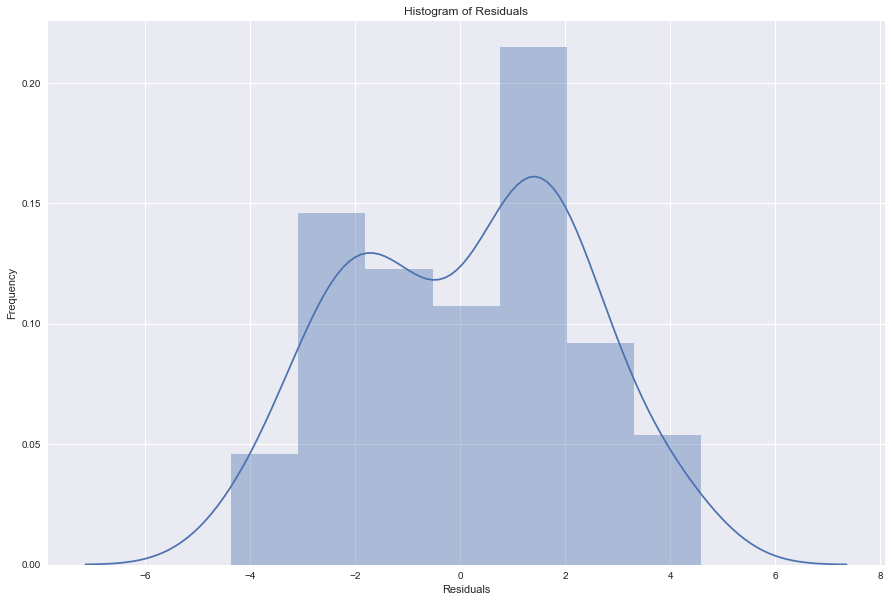

In [101]:
plt.figure(figsize=(15,10))
sns.distplot(test_residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#### Do you think there are any issues with the model? Are there any values or patterns seen in the previous graphs? 

# If you think any other graphs are necessary please make them here
There are no issues with the model. The histogram peaks at zero which means that the majority of the residual is zero.
This in turn means that most of the points are correctly plotted.

**Ans:**

### Using L1 Regularization and L2 Regularization

Here you'll use [L1 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) and [L2 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) from SKLearn to implement the regression. Use similar evaluation metrics as before to figure out which model has performed better. You can also use the ML Tutorial notebooks for help.

In [103]:
from sklearn.linear_model import LassoCV, RidgeCV

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(404, 12)
(404, 1)
(102, 12)
(102, 1)


In [104]:
L1_regressor = LassoCV()
L1_regressor

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [105]:
L2_regressor = RidgeCV()
L2_regressor

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [106]:
# Fit both your regressors
L1_regressor.fit(X_train, Y_train)
L2_regressor.fit(X_train,Y_train)
L1_test_pred = L1_regressor.predict(X_test)
L1_train_pred = L1_regressor.predict(X_train)
L2_train_pred = L2_regressor.predict(X_train)
L2_test_pred = L2_regressor.predict(X_test)

L1_train_res = L1_train_pred - Y_train
L1_test_res = L1_test_pred - Y_test

L1_train_residuals = Y_train - L2_train_pred
L1_test_residuals = Y_test - L2_test_pred

L2_train_residuals = Y_train - L2_train_pred
L2_test_residuals = Y_test - L2_test_pred


print("The Mean Squared Error on train set(using L1) is:", 
      mean_squared_error(Y_train, L1_train_pred))
print("The Absolute Error on train set(using L1) is:", 
      mean_absolute_error(Y_train, L1_train_pred))
print("The Mean Squared Error on test set(using L1) is:", 
      mean_squared_error(Y_test, L1_test_pred))
print("The Absolute Error on test set(using L1) is:", 
      mean_absolute_error(Y_test, L1_test_pred))


print("The Mean Squared Error on train set(using L2) is:", 
      mean_squared_error(Y_train, L2_train_pred))
print("The Absolute Error on train set(using L2) is:", 
      mean_absolute_error(Y_train, L2_train_pred))
print("The Mean Squared Error on test set(using L2) is:", 
      mean_squared_error(Y_test, L2_test_pred))
print("The Absolute Error on test set(using L2) is:", 
      mean_absolute_error(Y_test, L2_test_pred))




The Mean Squared Error on train set(using L1) is: 7.38099203509269e-05
The Absolute Error on train set(using L1) is: 0.006116694441720369
The Mean Squared Error on test set(using L1) is: 0.00012742957877541028
The Absolute Error on test set(using L1) is: 0.008419869928168157
The Mean Squared Error on train set(using L2) is: 2.1020094047633046e-05
The Absolute Error on train set(using L2) is: 0.0031587402720149884
The Mean Squared Error on test set(using L2) is: 3.641784745467909e-05
The Absolute Error on test set(using L2) is: 0.004054447102049146


C:\Users\gs\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Use some of the graphs and metrics given above to evaluate your model

# Graphs for L1

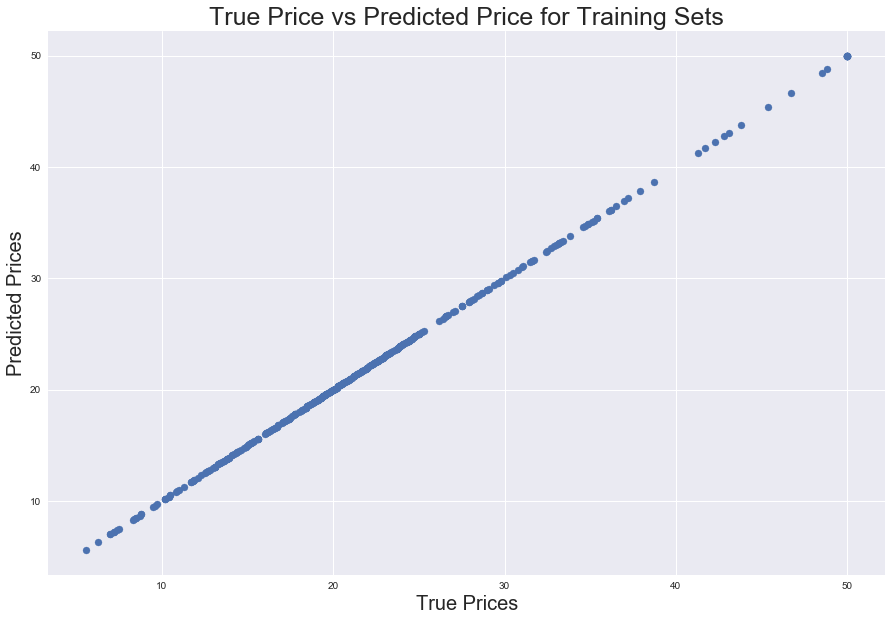

In [107]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train, L1_train_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price for Training Sets", size=25)
plt.show()

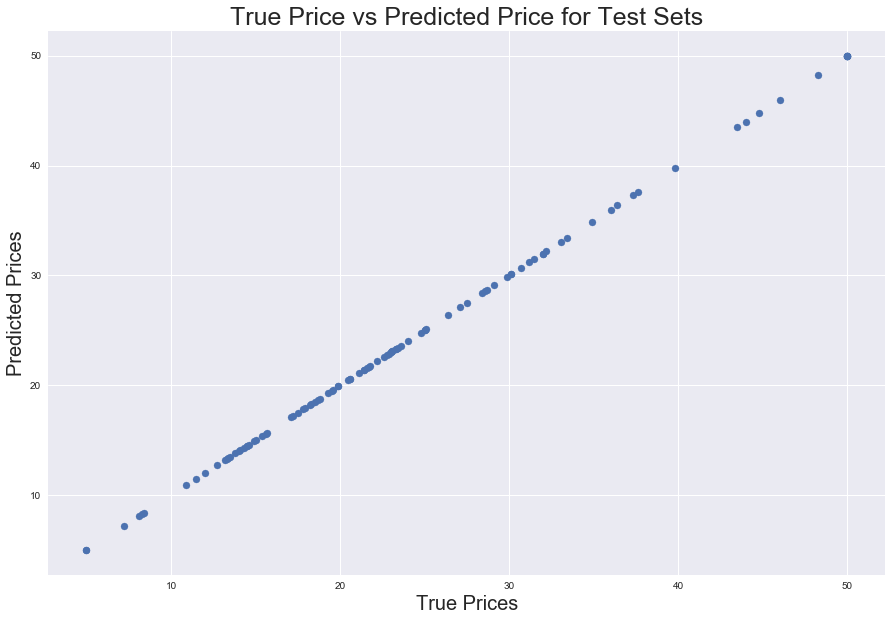

In [108]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, L1_test_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price for Test Sets", size=25)
plt.show()

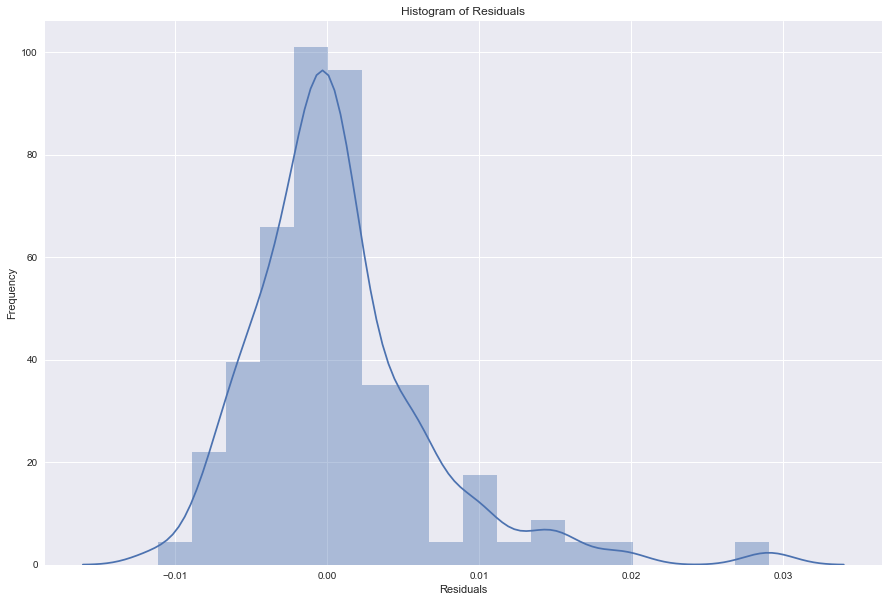

In [109]:
plt.figure(figsize=(15,10))
sns.distplot(L1_test_residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Graphs for L2

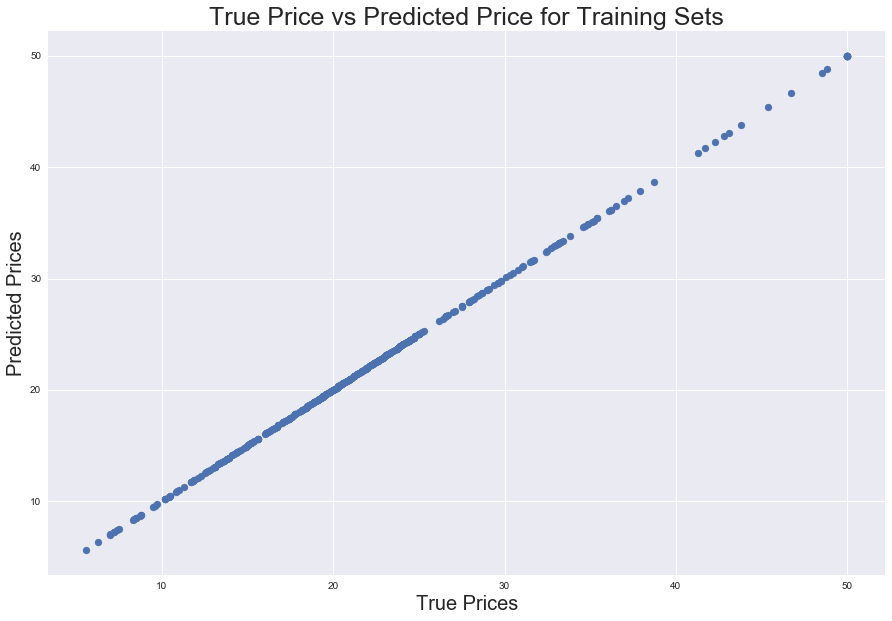

In [110]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train, L2_train_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price for Training Sets", size=25)
plt.show()

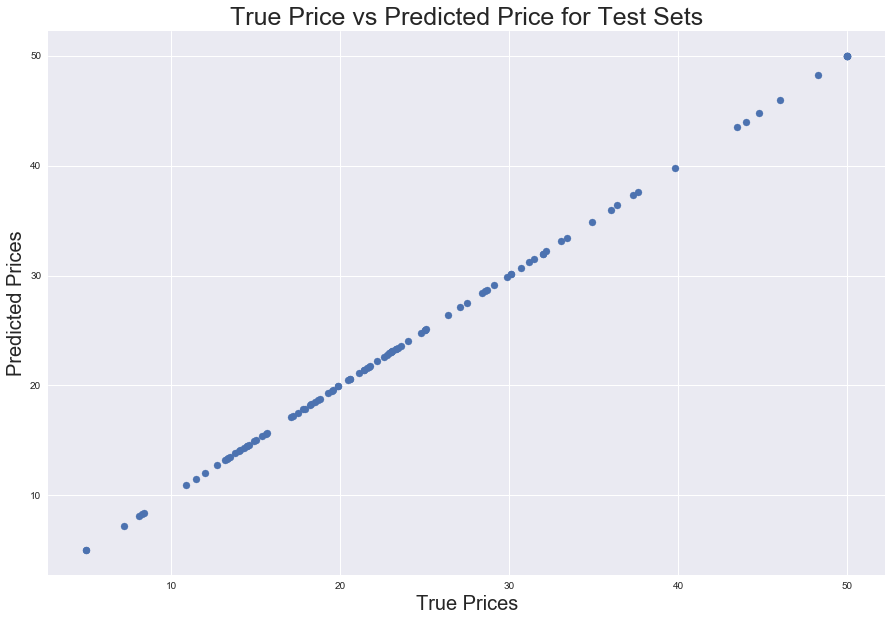

In [111]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, L2_test_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price for Test Sets", size=25)
plt.show()

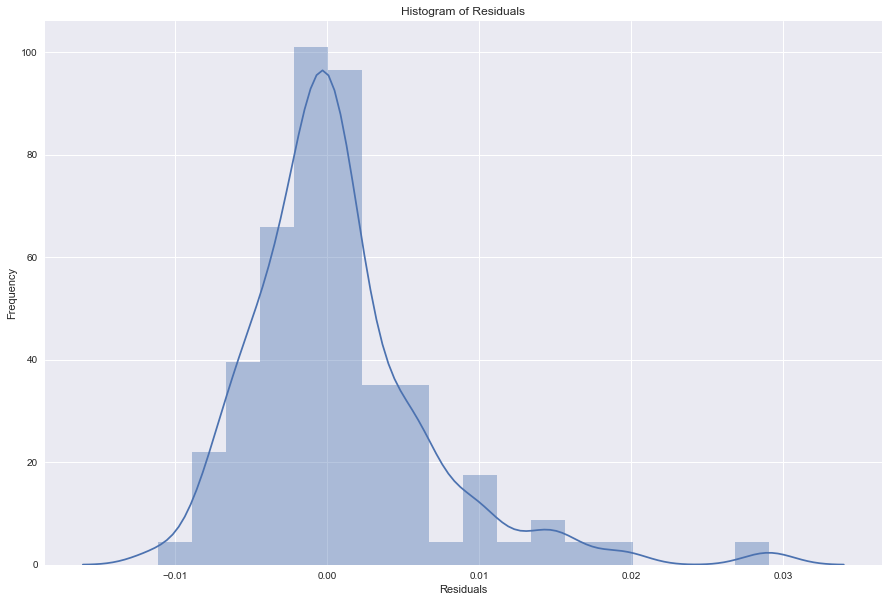

In [112]:
plt.figure(figsize=(15,10))
sns.distplot(L2_test_residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Descriptive Questions

#### Question 1: Which model performed better? Why do you say it was better?

**Ans:**  L2 performed better because its histogram had residuals closer to 0 than L1 however the difference was very small

#### Question 2

Suppose we estimate the regression coefficients in a linear regression model by minimizing

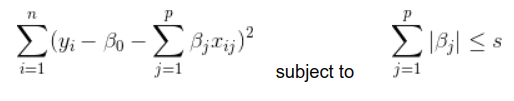

for a particular value of s. For each of the following indicate which one of i. through v. is correct.  Justify your answer.

i. Increase initially, and then eventually start decreasing in an inverted U shape.

ii. Decrease initially, and then eventually start increasing in  a U shape.

iii. Steadily increase.

iv. Steadily decrease.

v. Remain constant


**As, we increase s from 0**, explains what happens to each of the following: (a)  training RSS,  (b) test RSS, and (c) variance

**Ans:**
a) Training RSS

*(iv) Steadily decrease*.As s increases, that means B<sub>j</sub> will allow more values and will increase. This means that the negative sum -$\sum_{j=1}^p B$<sub>j</sub>x<sub>ij</sub> will increase . This means that RSS will steadily decrease as s increases.

(b) Test RSS

*(ii) Decrease initially, and then eventually start increasing in a U shape.* .As s increases, Test RSS will decrease initially and then eventually start increasing in a U shape. This is because B<sub>j</sub> is increasing slowly and causing the sum to decrease as in part a. This means that the test RSS will reach a min point after some time and then increase again as overfitting increases . This is shaped like a U since it decreases initially and then eventually starts increasing after a certain point.

(c) Variance

*(iii) Steadily increase* .As from part (b),there are more B<sub>j</sub> coefficients as s increases which means that the variance is steadily increasing as bias decreases.

#### Question 3:

Suppose we estimate the regression coefficients in a linear regression model by minimizing

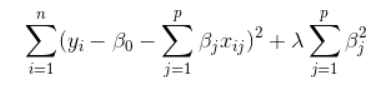

for a particular value of 𝛌. For each of the following indicate which one of i. through v. is correct.  Justify your answer.

i. Increase initially, and then eventually start decreasing in an inverted U shape.

ii. Decrease initially, and then eventually start increasing in  a U shape.

iii. Steadily increase.

iv. Steadily decrease.

v. Remain constant


**As, we increase  𝛌 from 0**, explains what happens to each of the following: (a)  training RSS,  (b) test RSS, and (c) variance


Ans : 
a) Training RSS

*(iii) Steadily increase* .As $\lambda$ increases, $\lambda\sum_{j=1}^p B^2$<sub>j</sub> increases, which means that the model will have a lower regression coefficient which means that B becomes less flexible and Training RSS will increase.

(b) Test RSS

*(ii). Decrease initially, and then eventually start increasing in a U shape.* As with the previous questions, Test RSS will decrease first, but then start increasing with overfitting. 

(c) Variance

*(iv). Steadily decrease.* Variance will decrease as B becomes less flexible (from part (a) ) which means that the model is more constrained.

## Part 2: Logistic Regression
Here you will be working on a classification problem from a dataset that we load from sklearn. Logistic Regression uses almost the same algorithm as Linear Regression with Gradient Descent, but the final output has a Sigmoid (Or a Softmax) *Activation Function* applied to it. Don't worry if you do not understand what this means, all you need to know is converts a continuous output into a Probability Distribution between 0 and 1.

[This link](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python) will teach you everything you need to know about Logistic Regression and applying it to this problem below.


**The Problem:** Given a piece of text, you want to classify it into one of four categories: 
1. Alternate-Atheism 
2. Religious - Christian 
3. Computer-Graphics
4. Scientific-Medicine

You will have to feature engineer the raw input into a more suitable input for logistic regression

### Dataset Loading

In [27]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
# The 20 newsgroups collection has become a popular data set 
# for experiments in text applications of machine learning techniques,
# such as text classification and text clustering.

In [28]:
# we will work on a partial dataset with only 4 categories out of the 20 available in the dataset:
# Only four categories are loaded to keep the dataset size manageable
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# We can now load the list of files matching those categories as follows:
dataset = fetch_20newsgroups(subset='all', categories=categories)
target_names = dataset.target_names
print(target_names)#['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

X = dataset.data
Y = dataset.target# define the target variable (dependent variable) as y
print("X is of length:", len(X), '\n')
print("All labels are:", np.unique(Y)) #target 
print("This label corresponds to:", target_names[Y[0]]) #target names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
X is of length: 3759 

All labels are: [0 1 2 3]
This label corresponds to: sci.med


In [29]:
print("First datapoint:", X[0])

First datapoint: From: geb@cs.pitt.edu (Gordon Banks)
Subject: Re: "CAN'T BREATHE"
Article-I.D.: pitt.19440
Reply-To: geb@cs.pitt.edu (Gordon Banks)
Organization: Univ. of Pittsburgh Computer Science
Lines: 23

In article <1993Mar29.204003.26952@tijc02.uucp> pjs269@tijc02.uucp (Paul Schmidt) writes:
>I think it is important to verify all procedures with proper studies to
>show their worthiness and risk.  I just read an interesting tidbit that 
>80% of the medical treatments are unproven and not based on scientific 
>fact.  For example, many treatments of prostate cancer are unproven and
>the treatment may be more dangerous than the disease (according to the
>article I read.)

Where did you read this?  I don't think this is true.  I think most
medical treatments are based on science, although it is difficult
to prove anything with certitude.  It is true that there are some
things that have just been found "to work", but we have no good
explanation for why.  But almost everything does ha

### Feature Engineering + Preprocessing

Your best friend is the [Scikit-Learn CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer). YOu can use to carry out the feature extraction. It has an in-built feature for n-gram vectorization as well. Do check out the documentation to figure out how to use simple Bag of Words and N-Gram vectorization. 

In [30]:
#we first need to turn the text content into numerical feature vectors.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#### Using Bag of Words Representation

In [31]:
# Choose the right arguments 
BoW_vectorizer = CountVectorizer()
BoW_features = BoW_vectorizer.fit_transform(X) # Get BoW from SKlearn CountVectorizer and store in variable
#Once fitted, the BoW_vectorizer has built a dictionary of feature indices:

#print(BoW_vectorizer.get_feature_names())
#print(BoW_vectorizer)
#print(BoW_features.toarray())

#BoW_vectorizer.vocabulary_.get(u'algorithm') #The index value of a word in the vocabulary is linked to 
                                             #its frequency in the whole training X.

BoW_tf_idf_Transformation = TfidfTransformer()
BoW_features = BoW_tf_idf_Transformation.fit_transform(BoW_features)

BoW_features.shape
    
#BoW_features.shape

(3759, 47319)

#### Using N-Gram Representation

In [32]:
# Choose the right arguments
NGram_vectorizer = CountVectorizer(ngram_range=(2, 2),min_df=1)
NGram_features = NGram_vectorizer.fit_transform(X)

BoW_tf_idf_Transformation2 = TfidfTransformer()
NGram_features = BoW_tf_idf_Transformation2.fit_transform(NGram_features)

# y_transform = TfidfTransformer()
# y_features = y_transform.fit_transform(Y)

normalized_y = Y / np.sqrt(np.sum(Y**2))
#NGram_features.shape
print(normalized_y)

[0.01696012 0.02544018 0.02544018 ... 0.01696012 0.         0.01696012]


### Logistic Regression
Here you'll be using the [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV) library from SKlearn (this one uses in-built cross validation as well). This part is open-ended and meant for you to explore how to change hyperparameters to get a good result. The coding here is simple - the only job you have to do is look at the documentation

In [33]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [34]:
# Carry out regression using SKLearn. Check the tutorials for tips
NGram_classifier = LogisticRegressionCV()
# # Write code here to get predictions
X_train, X_test, y_train, y_test = train_test_split(NGram_features, Y, test_size=0.2)

# fit a model
lm = NGram_classifier.fit(X_train, y_train)
NGram_predictions = lm.predict(X_test)
print ("Score : ", lm.score(X_test, y_test))

C:\Users\gs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\gs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Score :  0.9601063829787234


In [35]:
BoW_classifier = LogisticRegressionCV()
X_train, X_test, y_train, y_test = train_test_split(BoW_features, Y, test_size=0.2)
lm = BoW_classifier.fit(X_train, y_train)
BoW_predictions = lm.predict(X_test)
print ("Score : ", lm.score(X_test, y_test))

C:\Users\gs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\gs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Score :  0.9694148936170213


### Evaluation
Use scikit-learn's [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) to to see how good your models are. You can use the functions provided in the documentation. Data Science is about finding the right libraries to do the job, and again, the coding is simple, your job is to find the right functions.

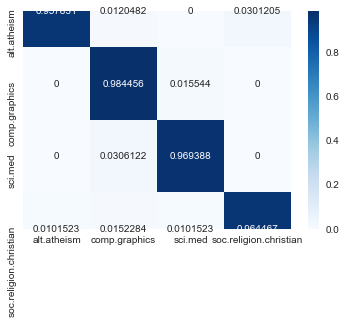

In [38]:
# Write code to evaluate both models to see which which one performed better
# # Write code to evaluate both models to see which which one performed better
# #from sklearn.metrics import plot_confusion_matrix
# import sys
# sys.executable
#from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
# #import scipy
# # Plot non-normalized confusion matrix
# titles_options = [("Confusion matrix, without normalization", None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(BoW_classifier, X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()
# box_cnf_matrix = metrics.confusion_matrix(y_test, predictions)
# cmn = box_cnf_matrix.astype('float') / box_cnf_matrix.sum(axis=1)[:, np.newaxis]
# plt.figure(figsize=(8,8))
# sns.heatmap(cmn)
# plt.tight_layout()
# plt.title('BoW Confusion Matrix', fontsize=15); 
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
box_cnf_matrix = metrics.confusion_matrix(y_test, BoW_predictions)
cmn = box_cnf_matrix.astype('float') / box_cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=target_names, yticklabels=target_names);

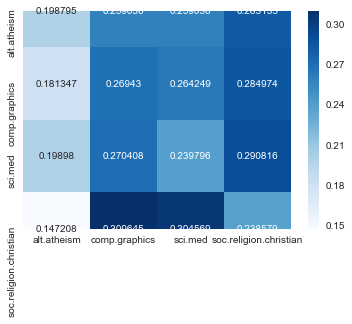

In [39]:
box_cnf_matrix = metrics.confusion_matrix(y_test, NGram_predictions)
cmn = box_cnf_matrix.astype('float') / box_cnf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=target_names, yticklabels=target_names);

In [40]:
# # Write code to evaluate both models to see which which one performed better
# #from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# #import scipy
# # Plot non-normalized confusion matrix
# titles_options = [("Confusion matrix, without normalization", None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(NGram_classifier, X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

### Which model was better? Why? Answer in terms of accuracy score and confusion matrix values

**Ans:**

According to the confusion matrix and the accuracy, Bag of Words is giving more accuracy than N_gram(taking N = 2). 
Analyze the confusion matrix for the Bag of words, we can clearly see that the there are a lot of zeros in it which means that the certain catogaries match almost perfectly. Like comp grap words mapped 0.9896 perfectly to computer graphic. None of these words are mapped to the atheism and christianity. Only 0.01 mapped to sci-med. hence it gives more accurate prediction. Whereas in Ngrams's confusion matrix, it can be seen that most of the chucks mapped to most of the catogories giving 0.3-0.2 to the perfect match. Accuracy score is almost same because there are words in Ngrams that mapped to most words for example "WE, CAN" can be mapped to most documents irrespective of catogories. That's why the Accuracy scores are almost same. After viewing this throuh the confusion matrix it is quite clear that BAG OF WORDS model is better than NGRAMS model. 